In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_Q2.csv")

In [3]:
df.shape

(110, 2)

In [4]:
df.head()

,id,value
0,11/1/04,0.5992
1,10/1/12,0.9259
2,1/1/07,5.9182
3,2/1/06,9.2365
4,6/1/07,22.7446


In [5]:
df_test = pd.read_csv("test_Q2.csv")

In [6]:
df_test.shape

(10, 1)

In [7]:
df_test.head()

,id
0,5/1/10
1,4/1/09
2,9/1/13
3,1/1/06
4,2/1/07


In [8]:
import datetime as dt
df['id'] = pd.to_datetime(df['id'])
df_test['date'] = pd.to_datetime(df_test['id'])

In [9]:
# changed column 'id' to numerical value
df['day']=df['id'].dt.day
df['month'] = df['id'].dt.month
df['year'] = df['id'].dt.year

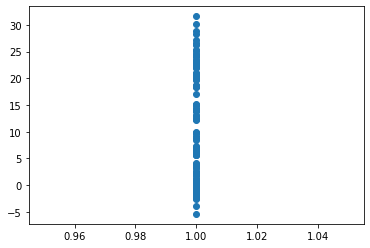

In [10]:
plt.scatter(df['day'],df['value'])
plt.show()

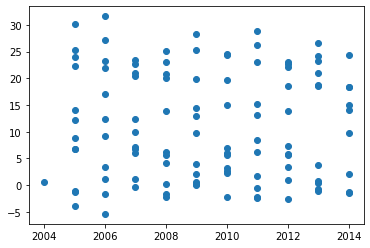

In [11]:
plt.scatter(df['year'],df['value'])
plt.show()

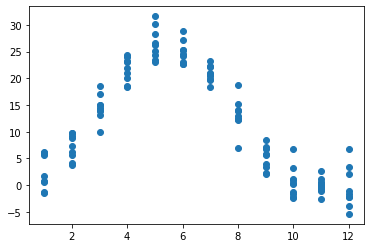

In [12]:
plt.scatter(df['month'],df['value'])
plt.show()

In [13]:
df =df.drop(['id','day','year'],axis=1)

In [14]:
df.head()

,value,month
0,0.5992,11
1,0.9259,10
2,5.9182,1
3,9.2365,2
4,22.7446,6


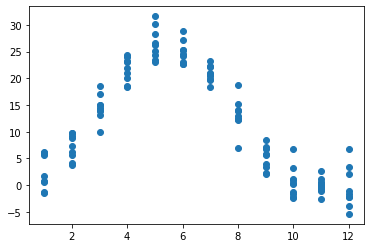

In [15]:
plt.scatter(df['month'],df['value'])

In [16]:
# creating x and y
x = np.array(df['month']).reshape(-1,1)
y = np.array(df['value']).reshape(-1,1)

In [17]:
df_test['month'] = df_test['date'].dt.month
z =np.array(df_test['month']).reshape(-1,1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

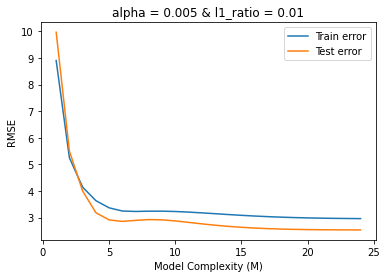

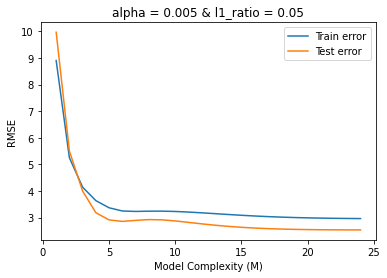

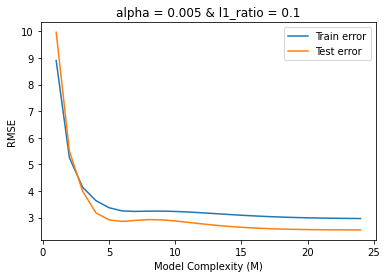

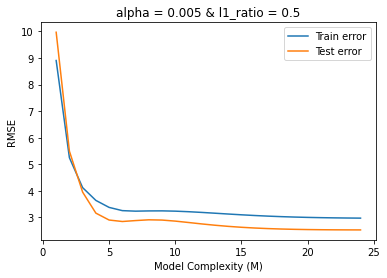

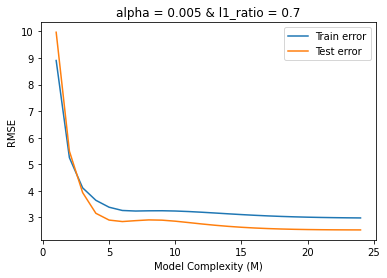

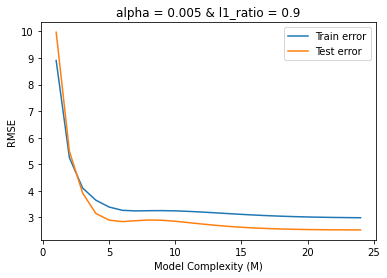

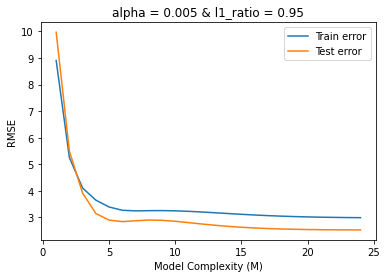

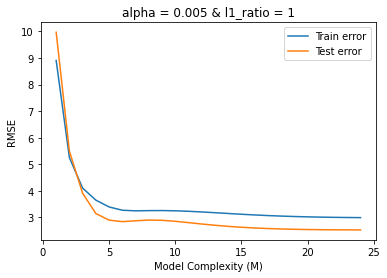

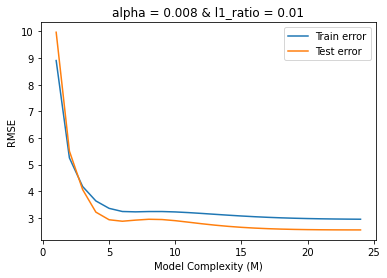

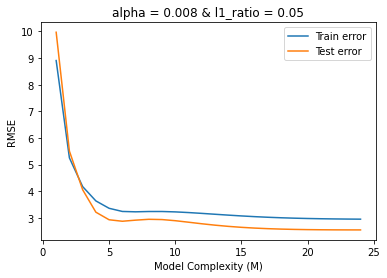

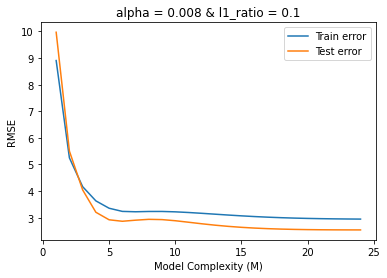

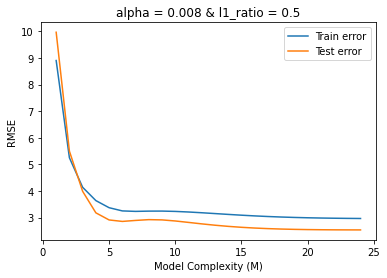

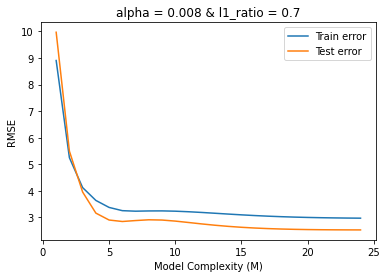

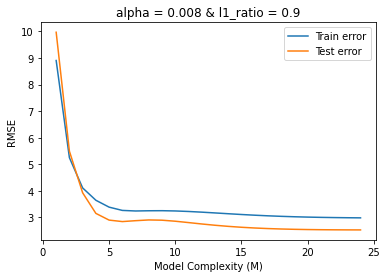

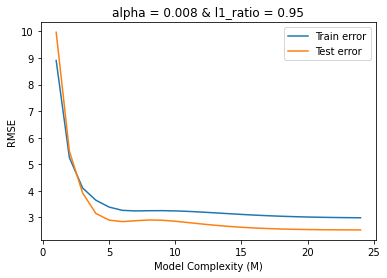

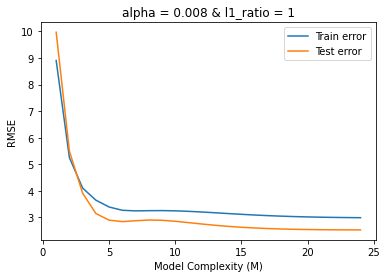

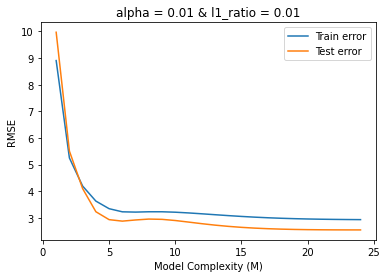

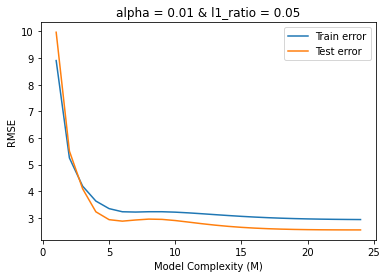

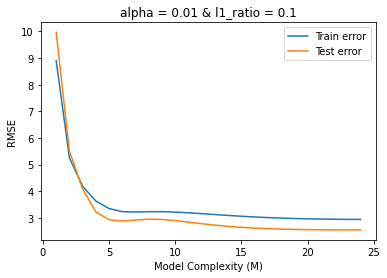

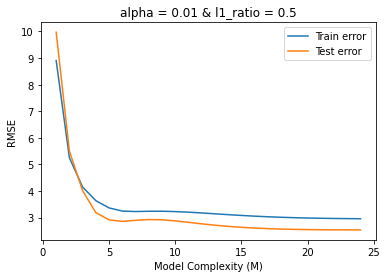

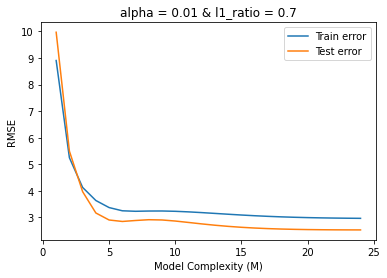

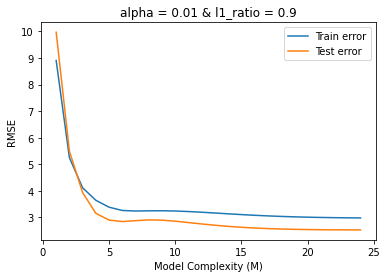

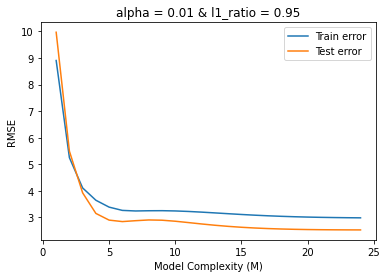

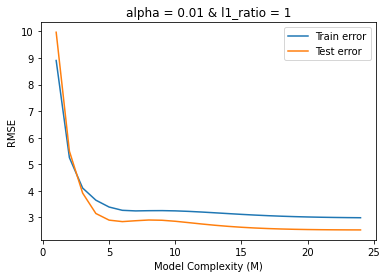

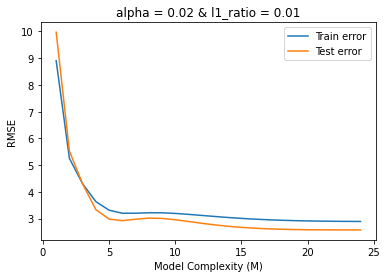

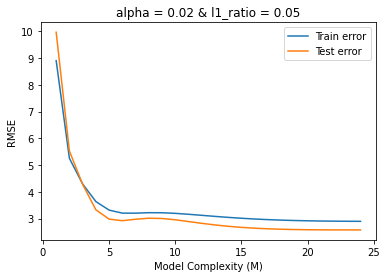

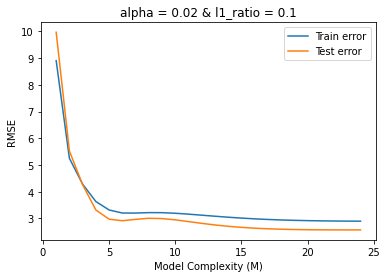

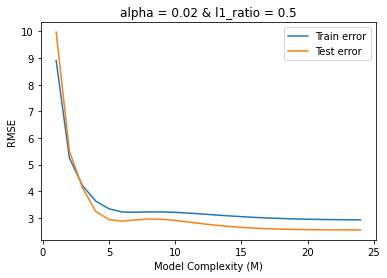

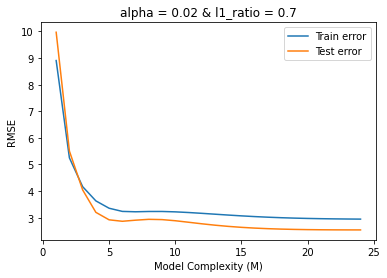

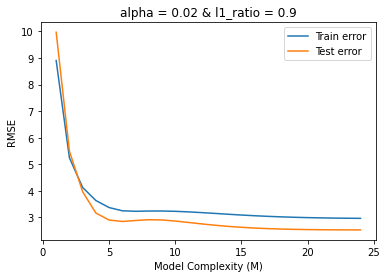

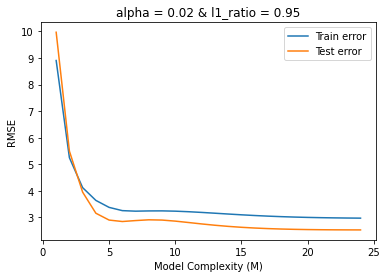

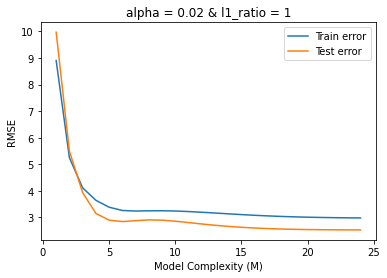

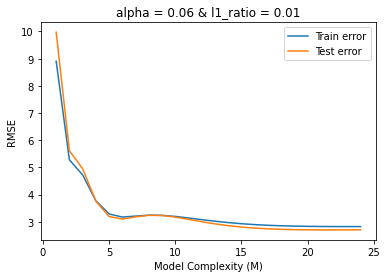

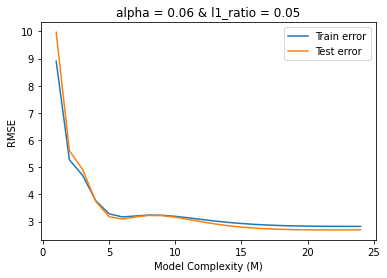

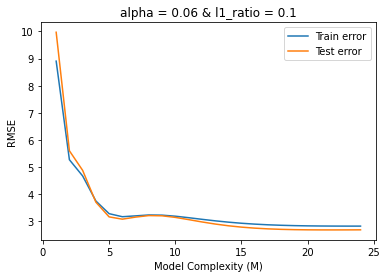

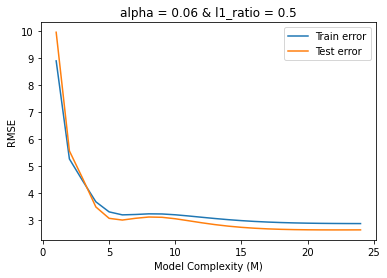

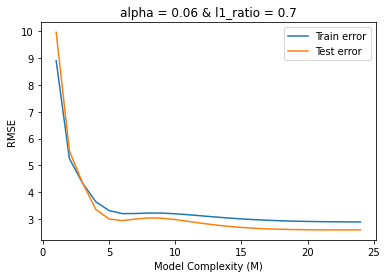

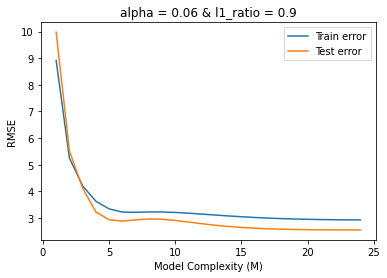

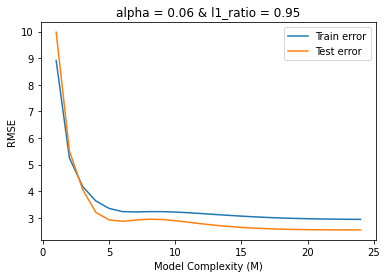

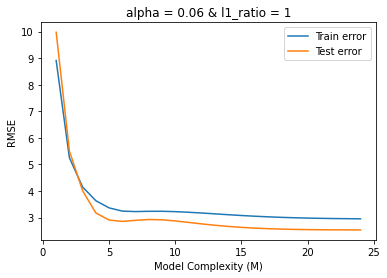

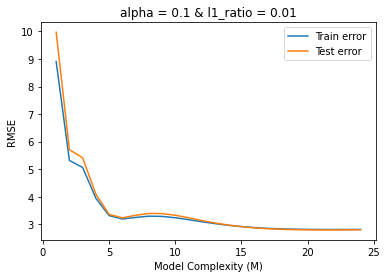

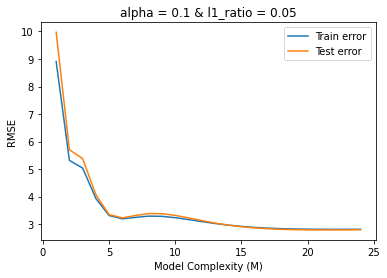

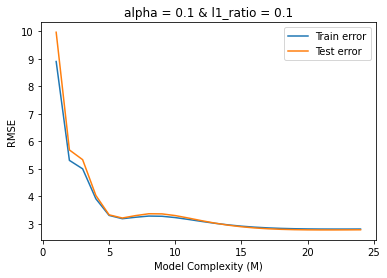

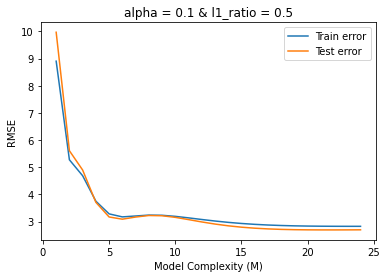

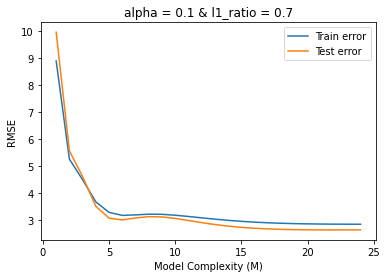

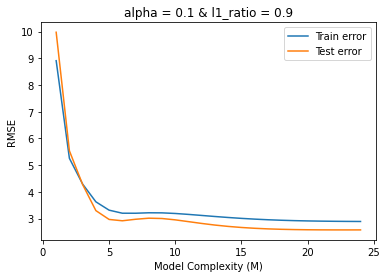

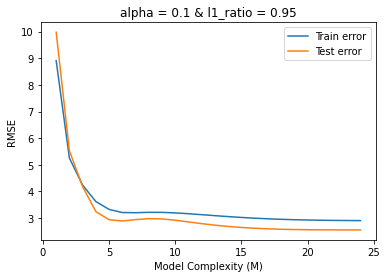

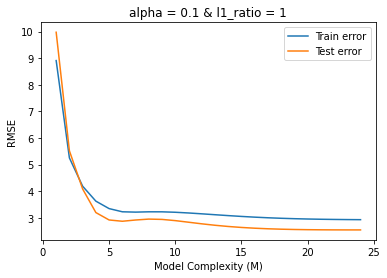

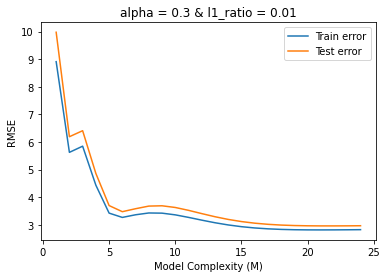

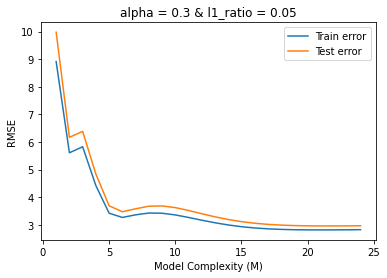

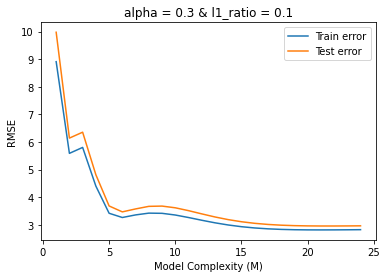

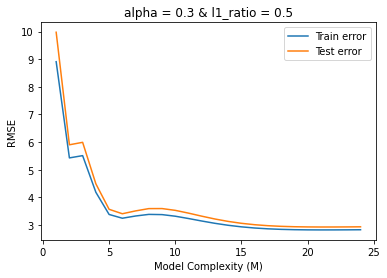

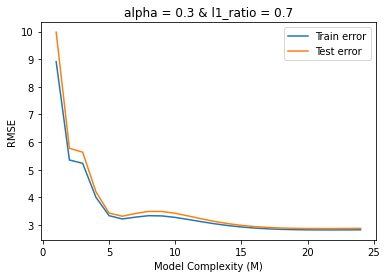

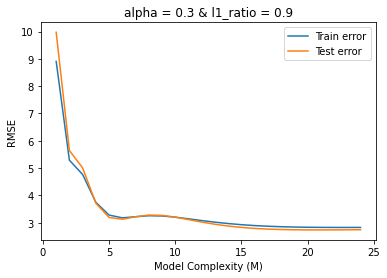

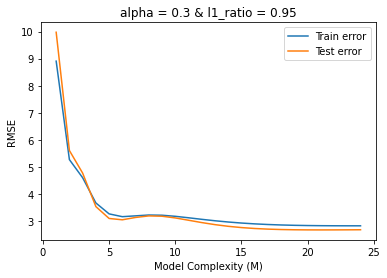

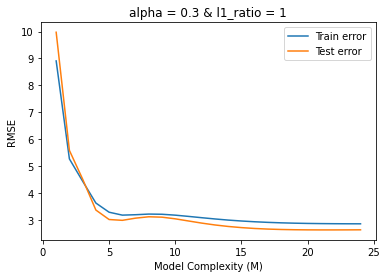

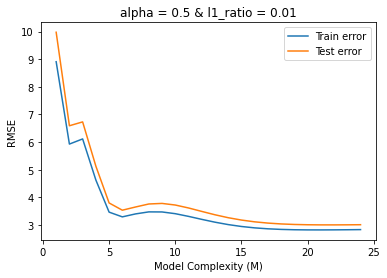

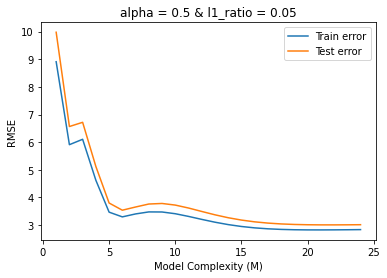

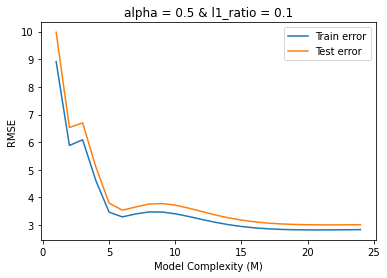

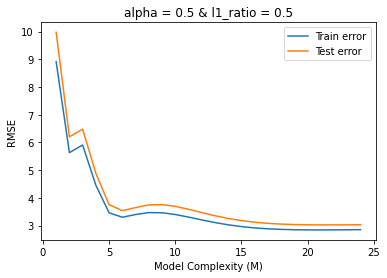

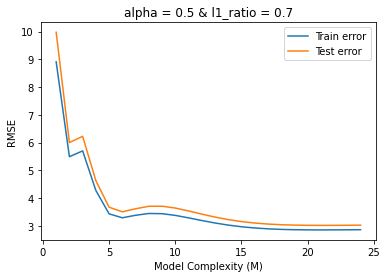

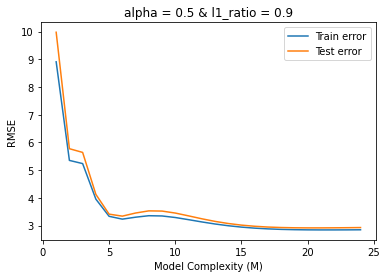

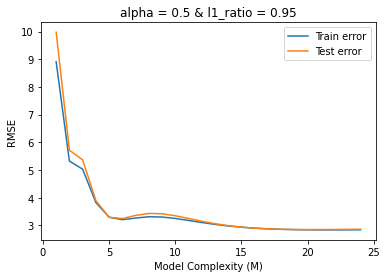

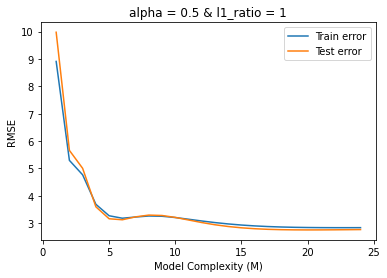

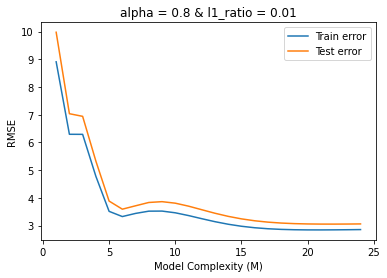

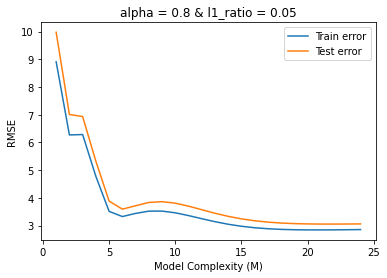

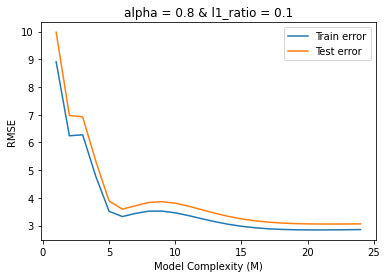

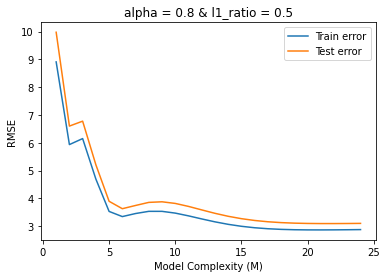

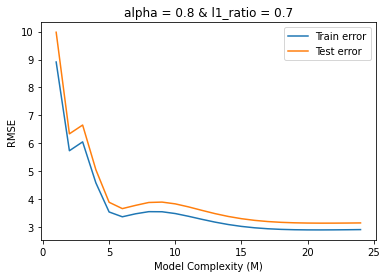

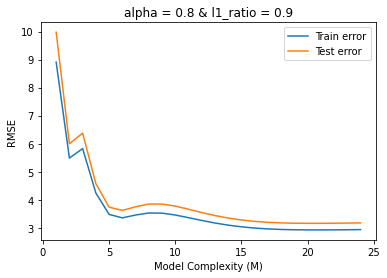

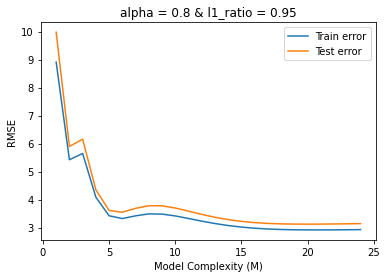

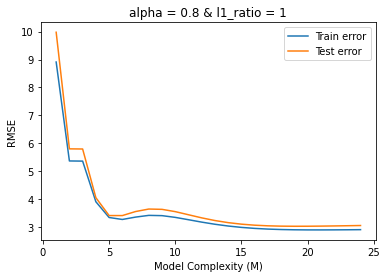

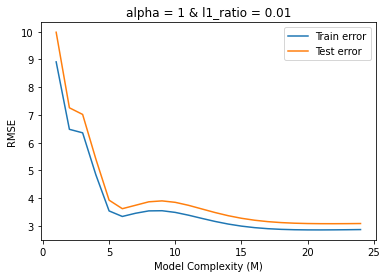

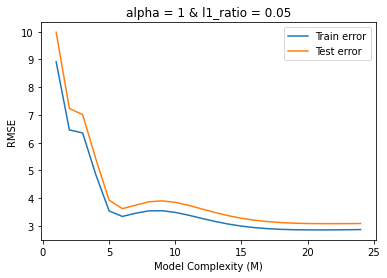

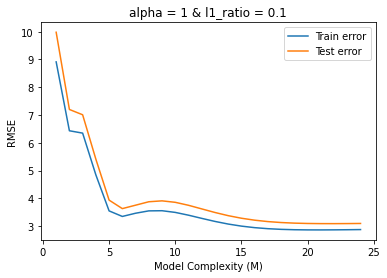

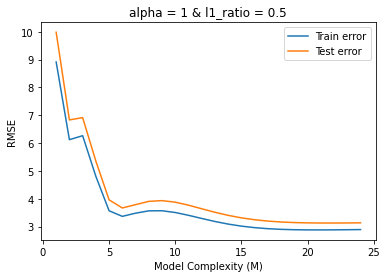

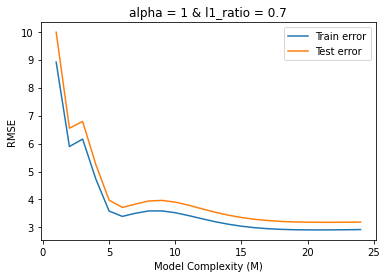

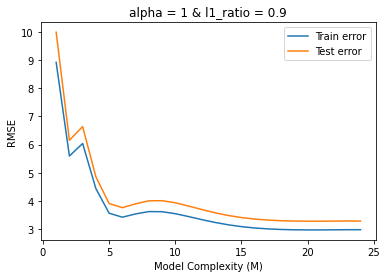

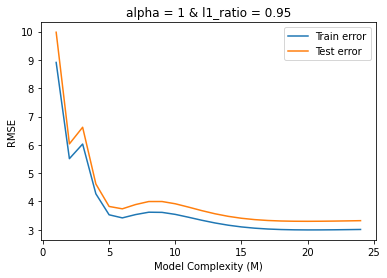

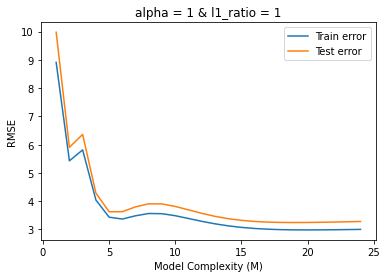

In [19]:
import warnings
warnings.filterwarnings('ignore')

alpha_ = [0.005,0.008,0.01,0.02,0.06,0.1,0.3,0.5,0.8,1]
l1_ratio_ = [0.01,0.05,0.1, 0.5, 0.7, 0.9, .95, 1]

for k in alpha_:
    for i in l1_ratio_:
        param_grid ={'alpha':[k],'l1_ratio':[i]}
        base_elastic_model = ElasticNet()
        grid_model = GridSearchCV(estimator=base_elastic_model,
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              cv=10,
                              verbose=0)
        # Training root mean square error 
        train_error = []
        # Test root mean square error 
        test_error = []
        for d in range(1,25):

            # Creating polynomial data for degree 'd'
            polynomial_converter = PolynomialFeatures(degree=d,interaction_only =False,include_bias=True)
            poly_features = polynomial_converter.fit_transform(x)

            # Splitting new polynomial dataset into train, test
            x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

            grid_model.fit(x_train,y_train)

            # Prediction on both training and testing set
            train_pred = grid_model.predict(x_train)
            test_pred = grid_model.predict(x_test)

            # Errors on Train Set
            train_rmse_error = np.sqrt(mean_squared_error(y_train,train_pred))

            # Errors on Test Set
            test_rmse_error = np.sqrt(mean_squared_error(y_test,test_pred))

            # Append errors to lists for plotting later
            train_error.append(train_rmse_error)
            test_error.append(test_rmse_error)

        plt.plot(range(1,25),train_error,label='Train error')
        plt.plot(range(1,25),test_error,label='Test error')
        plt.xlabel("Model Complexity (M)")
        plt.ylabel("RMSE")
        plt.title(f'alpha = {k} & l1_ratio = {i}')
        plt.legend()
        plt.show()

In [20]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [21]:
import warnings
warnings.filterwarnings('ignore')
alpha_opt = [0.1]
l1_ratio_opt = [0.01]

final_param_grid ={'alpha':alpha_opt,'l1_ratio':l1_ratio_opt}
final_base_elastic_model = ElasticNet()
final_grid_model = GridSearchCV(estimator=final_base_elastic_model,
                      param_grid=final_param_grid,
                      scoring='neg_mean_squared_error',
                      cv=10,
                      verbose=0)

# Creating polynomial data for
final_polynomial_converter = PolynomialFeatures(degree=20,interaction_only =False,include_bias=True)
final_poly_features = final_polynomial_converter.fit_transform(x)
poly_features_test = final_polynomial_converter.fit_transform(z)
# Splitting new polynomial dataset into train, test
x_train, x_test, y_train, y_test = train_test_split(final_poly_features, y, test_size=0.3, random_state=101)


final_grid_model.fit(x_train,y_train)

# Prediction on both training and testing set
train_pred = final_grid_model.predict(x_train)
test_pred = final_grid_model.predict(x_test)

# Errors on Train Set
train_rmse_error = np.sqrt(mean_squared_error(y_train,train_pred))

# Errors on Test Set
test_rmse_error = np.sqrt(mean_squared_error(y_test,test_pred))


print(train_rmse_error)
print(test_rmse_error)


2.8141574747598517
2.7974249903197097


In [22]:
final_test_predictions=final_grid_model.predict(poly_features_test)

In [23]:
final_test_predictions

array([23.15567422, 20.18057432,  6.16752144,  2.80768645,  9.0522498 ,
       13.86096488, 23.27697894, 15.16390885,  0.30082661, 20.08679728])

In [24]:
df[df['value']>0]

,value,month
0,0.5992,11
1,0.9259,10
2,5.9182,1
3,9.2365,2
4,22.7446,6
...,...,...
105,3.2992,9
106,22.0183,4
107,22.2829,7
108,23.1280,6


In [25]:
df_ = pd.DataFrame({'id': df_test['id'], 'value':final_test_predictions})

print('DataFrame:\n', df_)

# default CSV
df_.to_csv('result1.csv')

DataFrame:
         id      value
0   5/1/10  23.155674
1   4/1/09  20.180574
2   9/1/13   6.167521
3   1/1/06   2.807686
4   2/1/07   9.052250
5   8/1/12  13.860965
6   6/1/14  23.276979
7   3/1/08  15.163909
8  12/1/04   0.300827
9   7/1/11  20.086797
